In [1]:
# standard library
import json
from pathlib import Path
from pprint import pprint
import sys
sys.path.append('../../src')

# external
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skopt
import skopt.plots as skots
import xarray as xr

# custom
import src.optimize_bcibo as opt
import src.results_classes as resc
import src.ts_model as tsm
import src.visualization as vis

In [6]:
file_random = Path('raw/2023-02-09_miranda-art-random_opt-results.gz')
file_hammersly = Path('raw/2023-02-09_miranda-art-hammersly_opt-results.gz')

In [7]:
res_random = skopt.load(file_random)
res_hammersly = skopt.load(file_hammersly)

In [21]:
print( res_random.x )
print( res_hammersly.x )

[0.99, 0.01, 0.01]
[0.99, 0.99, 0.99]


In [8]:
assert res_random.specs['args']['initial_point_generator'] == 'random'
assert res_hammersly.specs['args']['initial_point_generator'] == 'hammersly'

# Cost function

load results:

In [39]:
results_hammersly = "raw/2023-02-16_19-04_5196_miranda-art-hammersly_results.json"
results_random =    "raw/2023-02-17_19-12_912a_miranda-art-random_results.json"
results = [results_hammersly, results_random]

In [60]:
synch_results = []
pms = []
prefix_hammersly = "2023-02-16_19-04_5196_miranda-art-hammersly"
prefix_random =   "2023-02-17_19-12_912a_miranda-art-random"
prefixes = [prefix_hammersly, prefix_random]
for prefix in prefixes:
    sim_result = json.loads(Path(f"raw/{prefix}_results.json").read_text())
    synch_result = np.array(sim_result['synch']['mean'])
    synch_result = np.exp(synch_result)
    synch_results.append(synch_result)

    pm = json.loads(Path(f"raw/{prefix}_parameters.json").read_text())
    pms.append(pm)

In [61]:
assert art_hammer_pm['sensitivity_tac'] == art_hammer_pm['sensitivity_vis'] \
== art_hammer_pm['specificity_tac'] == art_hammer_pm['specificity_vis']
_, ideal_y = opt.get_error(synch_results[0], art_hammer_pm['duration_trial'], art_hammer_pm['duration_unit'])

In [62]:
print(pms[0]["sensitivity_tac"])
print(pms[1]["sensitivity_tac"])

0.99
0.01


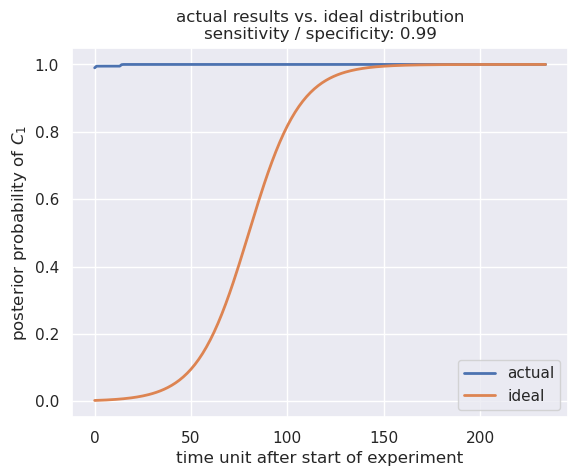

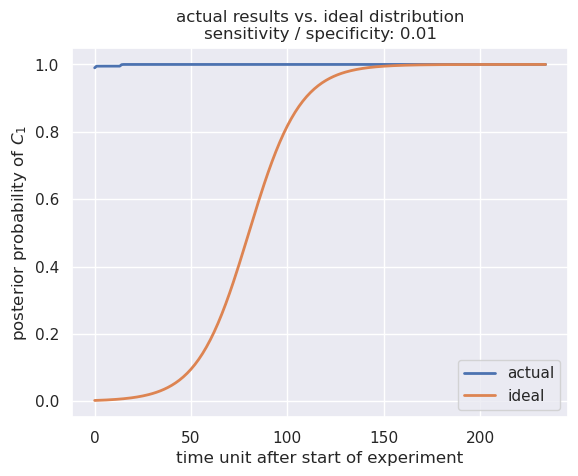

In [64]:
sns.set_theme()
for synch_result, art_pm in zip(synch_results, pms):
    fig, ax = plt.subplots()
    lw = 2
    ax.plot(synch_result, label="actual", linewidth=lw)
    ax.plot(ideal_y, label="ideal", linewidth=lw)
    sensitivity = art_pm['sensitivity_tac']
    ax.set_title(f"actual results vs. ideal distribution\nsensitivity / specificity: {sensitivity}")
    ax.set_ylabel("posterior probability of $C_1$")
    ax.set_xlabel("time unit after start of experiment")
    ax.legend()
    fig.savefig(f"actual-vs-ideal_{str(sensitivity)[-2:]}.png", dpi=200, bbox_inches="tight")

In [13]:
pm = tsm.Mresc.ModelResultsrom_json("raw/2023-02-16_19-04_5196_miranda-art-hammersly_parameters.json")
results = tsm.ModelResults.from_json("raw/2023-02-16_19-04_5196_miranda-art-hammersly_results.json")
inputs = xr.load_dataarray("raw/2023-02-16_19-04_5196_miranda-art-hammersly_inputs.nc")

fig, ax = vis.plot_traces(pm, results, inputs,
               title="posterior probability across conditions")
fig.savefig("inputs_across_conditions.png", dpi=200, bbox_inches="tight")

# Convergence plot

In [14]:
ax_random = skots.plot_convergence(res_random)
ax_random.set_title("Convergence plot (random)")
ax_random.get_figure().savefig("miranda-art-convergence-random.png", bbox_inches='tight')

In [15]:
ax_hammersly = skots.plot_convergence(res_hammersly)
ax_hammersly.set_title("Convergence plot (Hammersly)")
ax_hammersly.get_figure().savefig("miranda-art-convergence-hammersly.png", bbox_inches='tight')

In [16]:
res_random.fun == res_hammersly.fun

True

In [17]:
res_hammersly.x

[0.99, 0.99, 0.99]

In [18]:
res_random.x

[0.99, 0.01, 0.01]

# plot evaluations

array([[<AxesSubplot: xlabel='prior', ylabel='Number of samples'>,
        <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: ylabel='visual'>,
        <AxesSubplot: xlabel='visual', ylabel='Number of samples'>,
        <AxesSubplot: >],
       [<AxesSubplot: xlabel='prior', ylabel='tactile'>,
        <AxesSubplot: xlabel='visual'>,
        <AxesSubplot: xlabel='tactile', ylabel='Number of samples'>]],
      dtype=object)

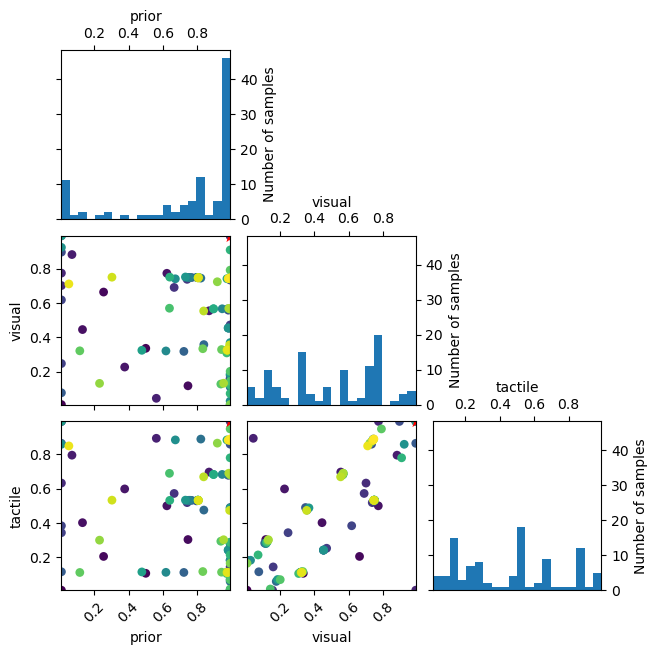

In [54]:
skots.plot_evaluations(res_hammersly,
                      dimensions=['prior', 'visual', 'tactile'])

In [66]:
1057 //24

44